In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # train test dataspilit
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
# Reading the data 
data = pd.read_csv("household_power_consumption.txt", sep = ";")

C:\Users\loki\AppData\Local\Temp\ipykernel_9360\1502573744.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("household_power_consumption.txt", sep = ";")


In [3]:
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
#combine date and time according to the formate 
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')


In [5]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [4]:
# droping the date and time as there's Datetime coulumn present 
data.drop(columns=['Date', 'Time'], inplace=True) 

In [5]:
#Impuattion and EDA
data.fillna(0, inplace= True)

In [6]:
#Finding any value or cell is empty 
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [7]:
# creatinf the features
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year
data['Weekday'] = data['Datetime'].dt.weekday

In [8]:
ed = LabelEncoder()

In [9]:
#converting objects to number to string 
for column in data.select_dtypes(include='object').columns:
    data[column] = data[column].astype(str)

In [10]:
#converting objects to number     
ed = LabelEncoder()
for i in data.select_dtypes(include='object').columns:
    data[i] = ed.fit_transform(data[i])
    print(i)

Global_active_power
Global_reactive_power
Voltage
Global_intensity
Sub_metering_1
Sub_metering_2


In [11]:
corr_data = data.corr()

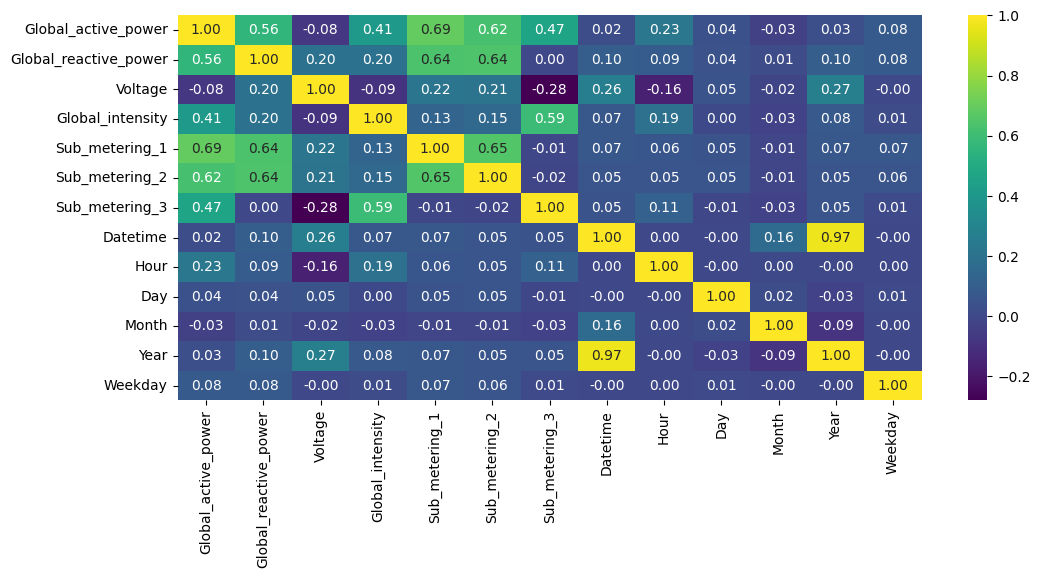

In [12]:
plt.figure(figsize=(12, 5))

sns.heatmap(corr_data, cmap="viridis", annot= True, fmt= ".2f")

plt.show()

In [16]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Hour', 'Day', 'Month', 'Year',
       'Weekday'],
      dtype='object')

In [17]:
col_to_be_removed = ["Sub_metering_3", "Voltage"]

data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Hour', 'Day', 'Month', 'Year',
       'Weekday'],
      dtype='object')

In [18]:
val = data.drop(['Datetime','Global_active_power'], axis = 1)

tar = data['Global_active_power']

In [19]:
trdata, tsdata, trlab, tslab = train_test_split(val, tar, test_size= 0.20, random_state= 77)


In [20]:
trdata.shape

(1660207, 11)

In [21]:
tsdata.shape

(415052, 11)

In [22]:
tar

0          2464
1          3090
2          3097
3          3104
4          2147
           ... 
2075254     509
2075255     508
2075256     504
2075257     502
2075258     501
Name: Global_active_power, Length: 2075259, dtype: int64

In [ ]:
# Building model 

In [40]:
lr_model = LinearRegression()

In [41]:
lr_model

LinearRegression()

In [42]:
lr_model.fit(trdata, trlab)

LinearRegression()

In [43]:
tr_pred = lr_model.predict(trdata) # Training predictin

ts_pred = lr_model.predict(tsdata) # test prediction

In [ ]:
# Validate perfromance 

In [ ]:
#train perfromance

In [44]:
mean_squared_error(trlab, tr_pred)

123349.40760338621

In [45]:
root_mean_squared_error(trlab, tr_pred)

351.21134321571424

In [ ]:
# compare test prediction and actual 

In [29]:
tslab
ts_pred

array([ 90.95075457, 465.95172042, 303.54596273, ..., 184.90335459,
       461.27041624, 960.90668844], shape=(415052,))

In [46]:
pred_data = pd.DataFrame({
    "actual": tslab,
    "pred": ts_pred
})

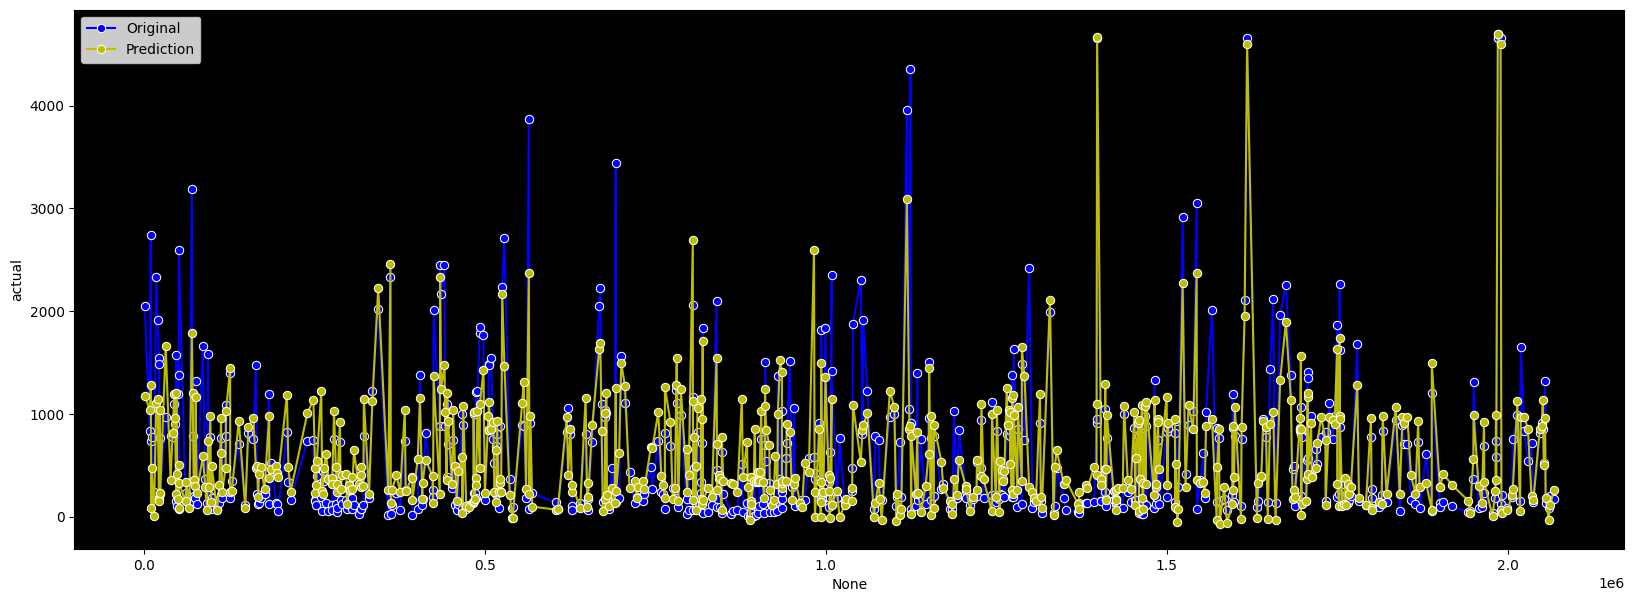

In [47]:
pred_data_20  = pred_data.head(600)

f, ax = plt.subplots(figsize= (20, 7))
ax.set_facecolor('black')

sns.lineplot(data = pred_data_20, x = pred_data_20.index, y = 'actual', marker = 'o', label = "Original", color = 'b')
sns.lineplot(data = pred_data_20, x = pred_data_20.index, y = 'pred', marker = 'o', label = "Prediction", color = 'y')

plt.legend()

plt.show()

In [ ]:

traindata, testdata, trainlab, testlab = train_test_split(val , tar, test_size= 0.20, random_state= 65)

In [48]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [49]:
rf_model.fit(trdata, trlab)

RandomForestRegressor(random_state=42)

In [ ]:
tr_pred_rf = rf_model.predict(trdata) # Training predictin

ts_pred_rf = rf_model.predict(tsdata) # test prediction

In [ ]:
mean_squared_error(trlab, tr_pred_rf)

In [ ]:
root_mean_squared_error(trlab, tr_pred)

In [ ]:

model_2 = DecisionTreeRegressor(max_depth = 3, 
                              min_samples_split = 13, 
                              max_features = 9 ,
                              random_state= 65)




NameError: name 'DecisionTreeRegressor' is not defined